# **DATA PREPROCESSING AND EDA ANALYSIS**






**Module import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
crop_price=pd.read_csv('crop_price_data.csv')
crop_production=pd.read_csv('crop_production_data.csv')
soil_analysis =pd.read_csv('soil_analysis_data.csv')
water_usage=pd.read_csv('water_usage_data.csv')

## **SOIL ANALYSIS**



In [ ]:
soil_analysis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1000 non-null   object 
 1   Soil Type                   1000 non-null   object 
 2   pH Level                    1000 non-null   float64
 3   Organic Matter (%)          1000 non-null   float64
 4   Nitrogen Content (kg/ha)    1000 non-null   float64
 5   Phosphorus Content (kg/ha)  1000 non-null   float64
 6   Potassium Content (kg/ha)   1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [ ]:
soil_analysis.shape

(1000, 7)

In [ ]:
soil_analysis.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292


In [ ]:
soil_analysis.describe()

,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.495453,1.993592,29.883358,19.729932,39.877907
std,0.517155,0.515340,5.202697,5.067005,4.874751
min,5.889492,0.155817,11.994574,4.961838,24.116481
25%,7.157881,1.638911,26.217325,16.216471,36.703917
50%,7.500129,1.981462,29.822797,19.913737,39.796016
75%,7.846940,2.345688,33.232056,23.122285,43.382039
max,9.038430,3.764528,45.760284,35.588406,54.678290


In [ ]:
soil_analysis.duplicated().sum()

0

In [ ]:
soil_analysis['Soil Type'].value_counts()

,count
Soil Type,
Black lava soil,144
Saline,135
Clay,130
Alkaline,127
Nitrogenous,123
Sandy,117
Loamy,117
Chalky (Calcareous),107


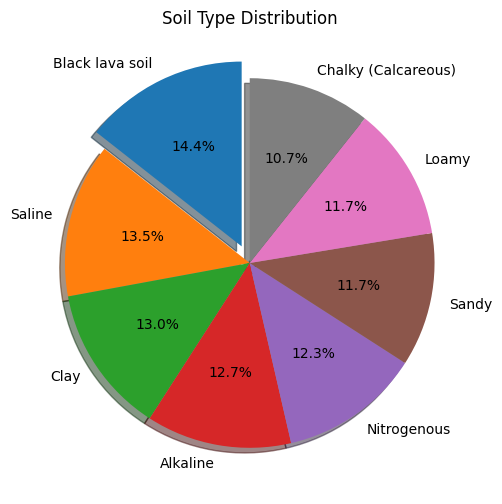

In [ ]:
# Get the value counts and normalize for percentages
data = soil_analysis["Soil Type"].value_counts(normalize=True)

# Define explode to cut out one slice (e.g., the first slice)
explode = [0.1] + [0] * (len(data) - 1)

# Create the pie chart using Matplotlib
plt.figure(figsize=(6,6))
plt.pie(
    data,
    labels=data.index,  # Set labels for the slices
    autopct='%1.1f%%',  # Display percentages on the slices
    explode=explode,  # Explode the first slice
    startangle=90,  # Rotate the pie chart for better visualization
    shadow=True
)

# Add title
plt.title('Soil Type Distribution')

# Show the plot
plt.show()
#####  As we can see Black lava soil dominate the soil type, & Chalky is the least.

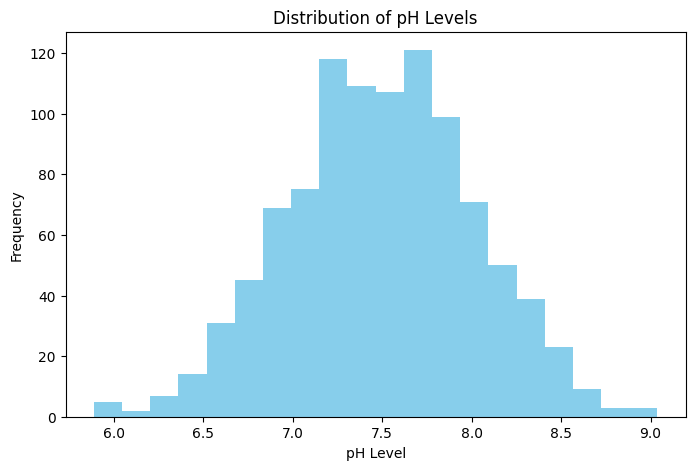

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(soil_analysis['pH Level'], bins=20, color='skyblue')
plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.title('Distribution of pH Levels')
plt.show()
### soil pH tends to be more alkaline (basic) than acidic

In [ ]:
soil_analysis.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292


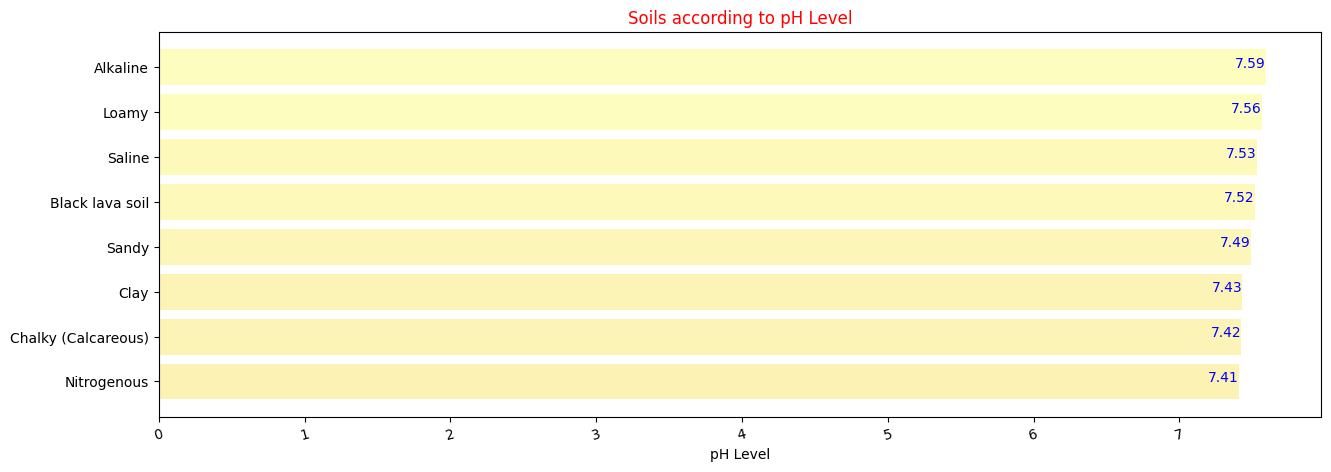

In [ ]:
# Prepare data
sa = soil_analysis.groupby(['Soil Type'])['pH Level'].mean().sort_values(ascending=True)[0:8]

# Create the plot
plt.figure(figsize=(15,5))
plt.barh(sa.index, sa.values, color=plt.cm.magma(sa.values / max(sa.values)))  # Use the 'magma' colormap for coloring

# Add text annotations
for i in range(len(sa)):
    plt.text(sa.values[i], i, f'{sa.values[i]:.2f}', color='blue', ha='right', fontsize=10)

# Labeling
plt.xlabel('pH Level')
plt.title('Soils according to pH Level', color='red')
plt.xticks(rotation=15)

# Show the plot
plt.show()
##Alkaline soil is the most basic followed by loamy and saline


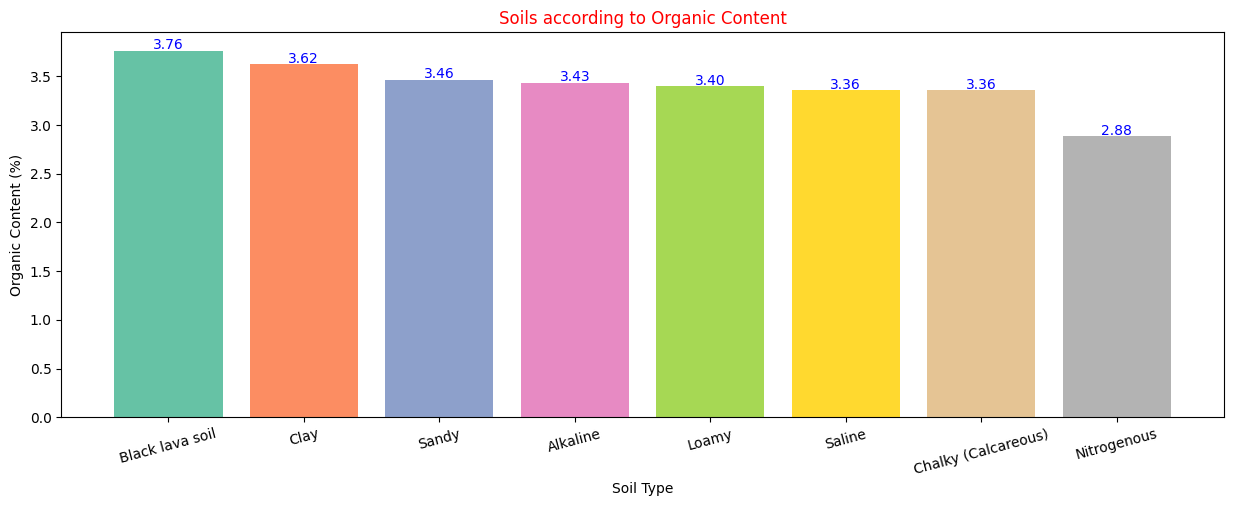

In [ ]:
# Prepare data
sa = soil_analysis.groupby(['Soil Type'])['Organic Matter (%)'].max().sort_values(ascending=False)[0:8]

# Create the plot
plt.figure(figsize=(15,5))
plt.bar(sa.index, sa.values, color=plt.cm.Set2.colors)  # Using 'Set2' colormap for colors

# Add text annotations
for i in range(len(sa)):
    plt.text(i, sa.values[i] + 0.02, f'{sa.values[i]:.2f}', color='blue', ha='center', fontsize=10)

# Labeling
plt.xlabel('Soil Type')
plt.ylabel('Organic Content (%)')
plt.title('Soils according to Organic Content', color='red')

# Rotate x-axis labels for readability
plt.xticks(rotation=15)

# Show the plot
plt.show()


## Here, Black lava soil has the most Organic content followed by Clay soil & Sanday.


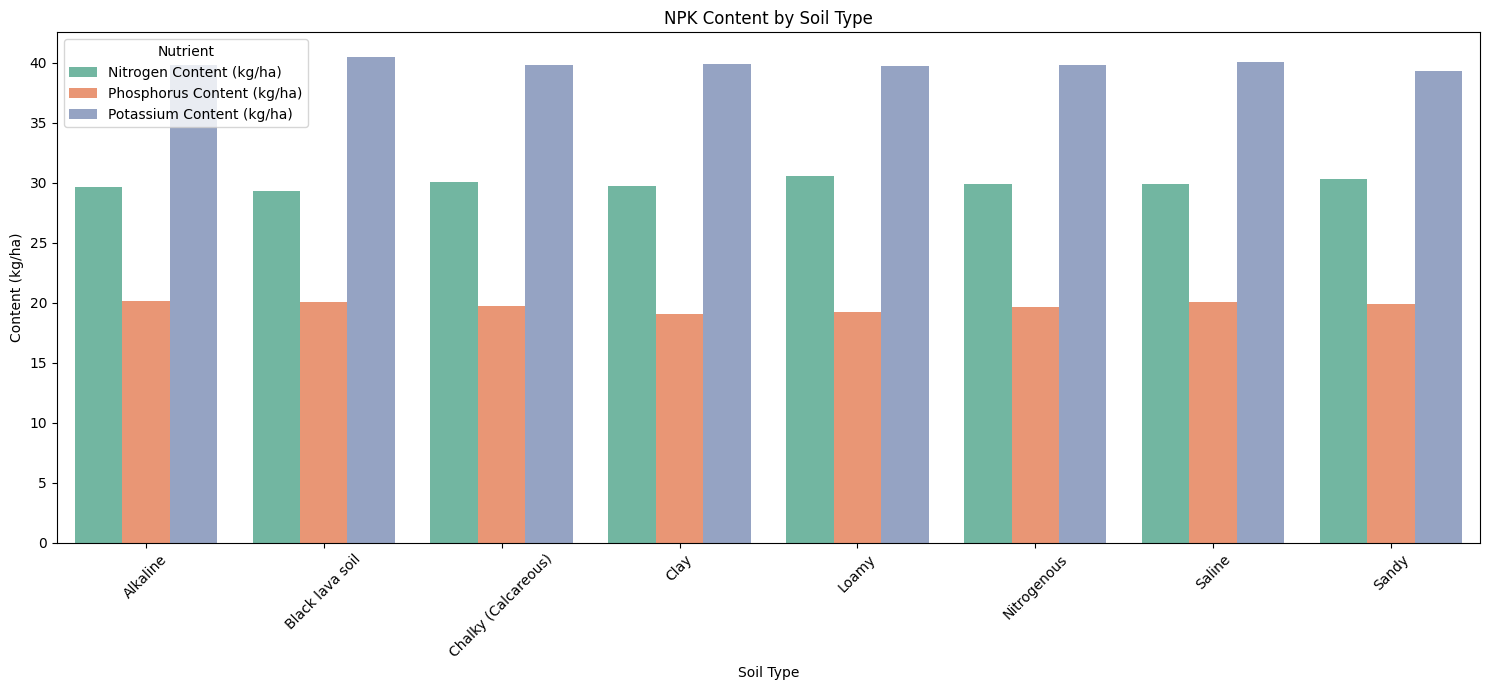

In [ ]:
# Prepare data
soil_types = soil_analysis['Soil Type'].unique()
npk_data = soil_analysis.groupby('Soil Type')[['Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']].mean()

# Reshape the data to long format for Seaborn
npk_long = npk_data.reset_index().melt(id_vars='Soil Type', var_name='Nutrient', value_name='Content (kg/ha)')

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(data=npk_long, x='Soil Type', y='Content (kg/ha)', hue='Nutrient', palette='Set2')

# Add labels, title, and adjust x-axis labels
plt.xlabel('Soil Type')
plt.ylabel('Content (kg/ha)')
plt.title('NPK Content by Soil Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()






## **CROP PRODUCTION ANALYSIS**



In [ ]:
crop_production.shape

(1000, 6)

In [ ]:
crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  1000 non-null   object 
 1   Crop                      1000 non-null   object 
 2   Season                    1000 non-null   object 
 3   Area (hectares)           1000 non-null   float64
 4   Yield (quintals)          1000 non-null   float64
 5   Production (metric tons)  1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [ ]:
crop_production.head()

,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons)
0,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.152230
1,Kota,Gram,Rabi,16943.065614,45.818232,7763.013072
2,Jaipur,Wheat,Rabi,14297.539876,29.752629,4253.893981
3,Hanumangarh,Coriander,Rabi,19737.638447,42.026511,8295.040749
4,Hanumangarh,Citrus,Rabi,13591.576842,38.195933,5191.429648


In [ ]:
crop_production['Crop'].value_counts()

,count
Crop,
Citrus,52
Pulses,50
Mustard,50
Maize,49
Tomato,49
Onion,47
Cumin,47
Mango,46
Barley,46


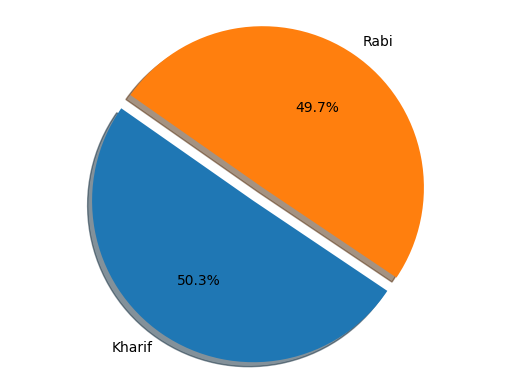

In [ ]:
#crop_production.Season.value_counts().plot(kind="pie")

# Calculate value counts
sizes = crop_production['Season'].value_counts()
labels = sizes.index

# Define which slice to explode (e.g., explode the first slice)
explode = [0] * len(sizes)  # Explode all slices by 10%
explode[0] = 0.1  # Explode the first slice more

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=145,shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.show()

### As we can see majority of the crops are of Kharif Season (50%)


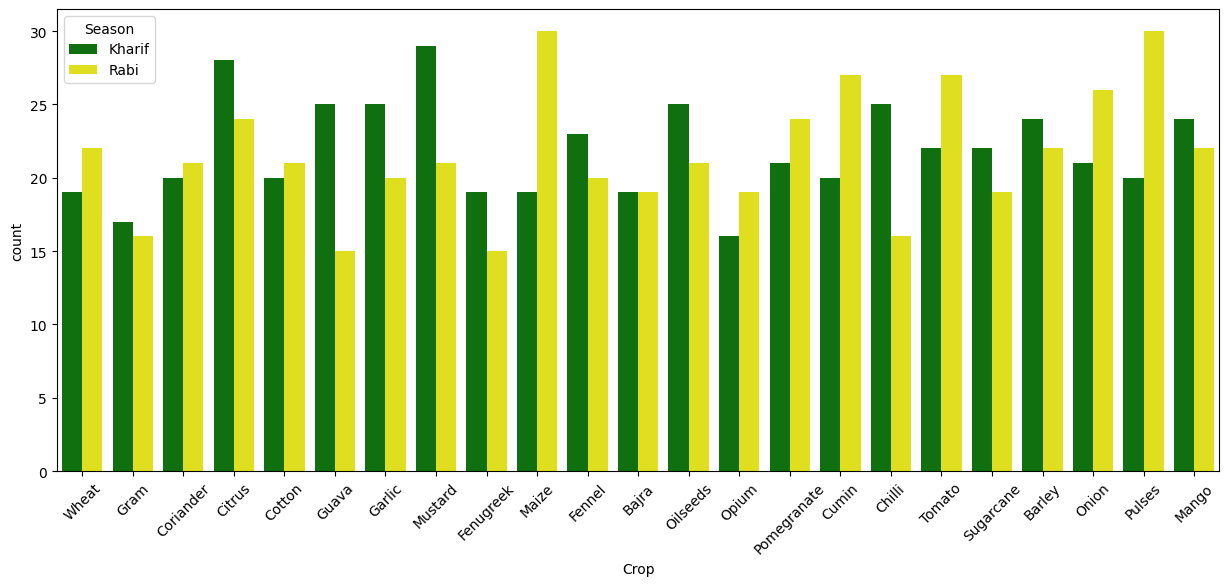

In [ ]:
##The bar for the rabi season is taller compared to the bar for the kharif season.
##This means Rice was harvested more in the Kharif season.
##Comparing the heights of bars within each crop category shows how the counts differ between the two seasons.
plt.figure(figsize=(15,6))
sns.countplot(x='Crop',hue="Season", data = crop_production,palette={'Rabi': 'yellow', 'Kharif': 'green'})
plt.xticks(rotation=45)
plt.show()

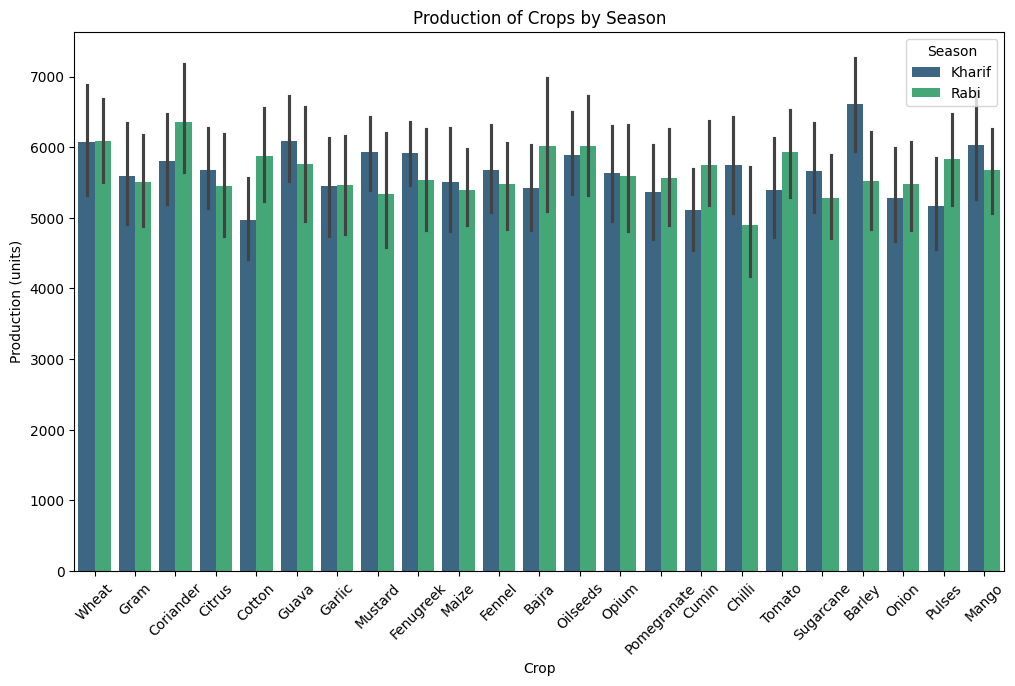

In [ ]:
# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='Crop', y='Production (metric tons)', hue='Season', data=crop_production, palette='viridis')

# Customizing the plot
plt.xticks(rotation=45)
plt.title('Production of Crops by Season')
plt.xlabel('Crop')
plt.ylabel('Production (units)')
plt.legend(title='Season')
plt.show()




Crop
Bajra          217345.662050
Barley         279998.287063
Chilli         222147.104142
Citrus         289837.647729
Coriander      249618.135716
Cotton         222843.227587
Cumin          257363.304204
Fennel         240180.623502
Fenugreek      195344.329739
Garlic         245697.584225
Gram           183123.816971
Guava          238516.083973
Maize          266552.551521
Mango          269407.637938
Mustard        284292.762493
Oilseeds       273401.236730
Onion          253324.651625
Opium          196258.320655
Pomegranate    246098.687258
Pulses         278236.897986
Sugarcane      224876.152149
Tomato         278765.643223
Wheat          249288.136189
Name: Production (metric tons), dtype: float64


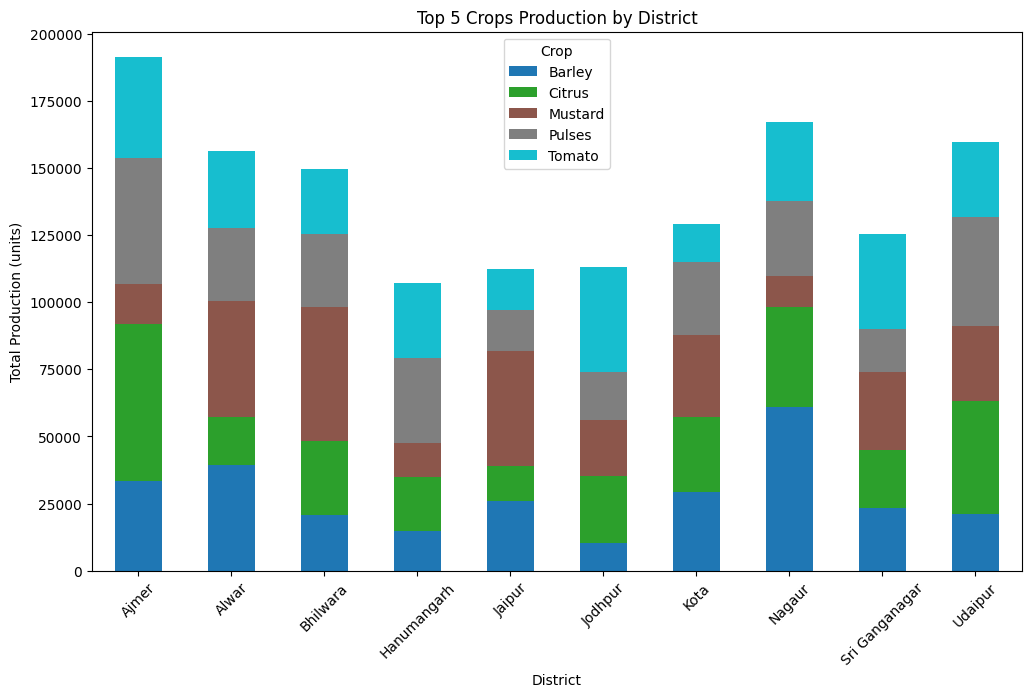

In [ ]:

# Step 1: Calculate total production for each crop
total_production_per_crop = crop_production.groupby('Crop')['Production (metric tons)'].sum()
print(total_production_per_crop)

# Step 2: Get the top 5 crops with the highest production
top_crops = total_production_per_crop.nlargest(5).index
# print(top_crops)

# Step 3: Filter the DataFrame to include only the top 5 crops
filtered_data = crop_production[crop_production['Crop'].isin(top_crops)]
# print(filtered_data)
# Step 4: Group by District and Crop, then count occurrences
grouped = filtered_data.groupby(['District', 'Crop']).sum().reset_index()
# print(grouped)
# Pivot the data for stacking
pivot_df = grouped.pivot(index='District', columns='Crop', values='Production (metric tons)').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab10')

plt.title('Top 5 Crops Production by District')
plt.xlabel('District')
plt.ylabel('Total Production (units)')
plt.xticks(rotation=45)
plt.legend(title='Crop')
plt.show()






# **CROP PRICE ANALYSIS**

In [ ]:
crop_price.shape

(4819, 5)

In [ ]:
crop_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   District             4819 non-null   object 
 1   Crop                 4819 non-null   object 
 2   Market               4819 non-null   object 
 3   Date                 4819 non-null   object 
 4   Price (INR/quintal)  4819 non-null   float64
dtypes: float64(1), object(4)
memory usage: 188.4+ KB


In [ ]:
crop_price.head()

,District,Crop,Market,Date,Price (INR/quintal)
0,Alwar,Barley,Alwar APMC Mandi,2018-09-05,2490.092421
1,Sri Ganganagar,Pomegranate,Padampur Mandi,2018-11-20,2348.904922
2,Kota,Maize,Ramganj Mandi,2018-04-06,2448.287513
3,Nagaur,Fenugreek,Didwana Mandi,2018-09-26,2714.419518
4,Nagaur,Gram,Didwana Mandi,2018-10-06,2883.356997


In [ ]:
len(crop_price['Market'].value_counts())

24

In [ ]:
# crop_price['District']['Market'].value_counts()

In [ ]:
# Check the dtype of the 'Date' column
print(crop_price['Date'].dtype)


object


In [ ]:
# # Convert 'Date' column to datetime format if it's not already
# crop_production['Date'] = pd.to_datetime(crop_production['Date'])

# # Extract year from 'Date'
# crop_production['Year'] = crop_production['Date'].dt.year

# # Identify the top 5 crops based on average price
# top_crops = crop_price.groupby('Crop')['Price (INR/quintal)'].mean().nlargest(10).index

# # Filter the DataFrame to include only these top 5 crops
# filtered_data = crop_price[crop_price['Crop'].isin(top_crops)]

# # Group by Year and Crop, then calculate the average price
# price_trends = filtered_data.groupby(['Year', 'Crop'])['Price (INR/quintal)'].mean().reset_index()

# # Plotting
# plt.figure(figsize=(14, 7))
# sns.lineplot(x='Year', y='Price (INR/quintal)', hue='Crop', data=price_trends, marker='o')
# plt.title('Price Trends by Year for Top 5 Crops')
# plt.xlabel('Year')
# plt.ylabel('Price (INR/quintal)')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend(title='Crop',loc="lower right")
# plt.show()


# **WATER USAGE ANALYSIS**

In [ ]:
water_usage.shape

(1000, 5)

In [ ]:
water_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   District                             1000 non-null   object 
 1   Crop                                 1000 non-null   object 
 2   Irrigation Method                    1000 non-null   object 
 3   Water Consumption (liters/hectare)   1000 non-null   float64
 4   Water Availability (liters/hectare)  1000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [ ]:
water_usage.head()

,District,Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare)
0,Udaipur,Garlic,Tube Well,11609.330886,11335.919980
1,Bhilwara,Gram,Drip Irrigation,12648.406038,12091.900254
2,Udaipur,Guava,Canal Irrigation,10063.162448,9810.943169
3,Jodhpur,Barley,Sprinkler Irrigation,10110.539993,10754.217313
4,Alwar,Gram,Canal Irrigation,9320.451018,8695.537819


In [ ]:
water_usage['Irrigation Method'].value_counts()

,count
Irrigation Method,
Sprinkler Irrigation,284
Tube Well,252
Drip Irrigation,243
Canal Irrigation,221


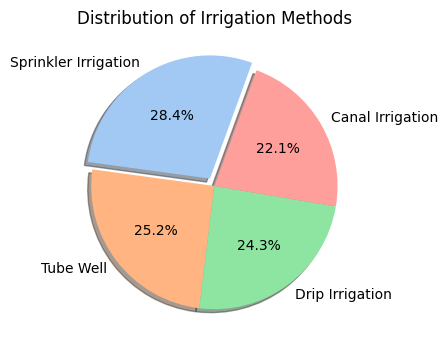

In [ ]:

# Count the occurrences of each irrigation method
method_counts = water_usage['Irrigation Method'].value_counts()
explode = [0.07] + [0] * (len(method_counts) - 1)

# Plotting
plt.figure(figsize=(4,4))
plt.pie(method_counts, labels=method_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=70,explode=explode,shadow=True)
plt.title('Distribution of Irrigation Methods')
plt.show()
###Sprinkler Irrigation is prefered by 28.4% Farmers, than Tube well.


In [ ]:
total_water_consumption = water_usage.groupby('Crop')['Water Consumption (liters/hectare)'].mean()
total_water_consumption.sort_values(ascending=False)

,Water Consumption (liters/hectare)
Crop,
Onion,11155.674255
Guava,11004.224175
Fenugreek,11003.932207
Fennel,10997.255129
Sugarcane,10866.977090
Oilseeds,10845.013402
Garlic,10787.609412
Citrus,10784.630146
Cumin,10755.559521


<ipython-input-148-cb5e9d55f55c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_water_consumption_sum.values, y=total_water_consumption_sum.index, palette='viridis')


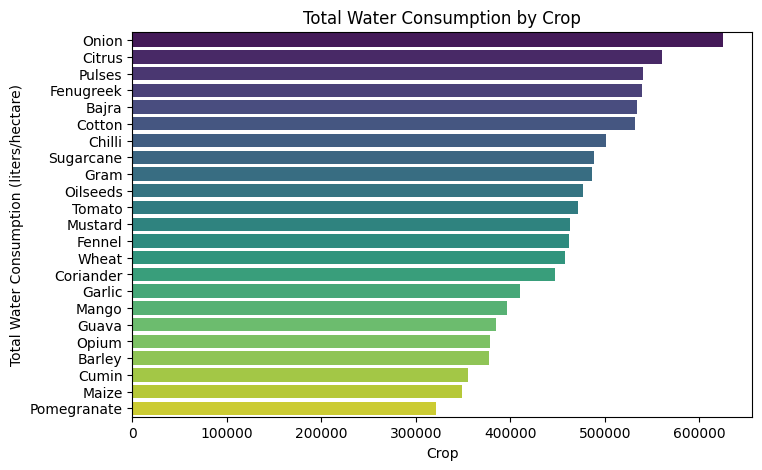

In [ ]:

# Calculate total water consumption
total_water_consumption_sum = water_usage.groupby('Crop')['Water Consumption (liters/hectare)'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=total_water_consumption_sum.values, y=total_water_consumption_sum.index, palette='viridis')
plt.title('Total Water Consumption by Crop')
plt.xlabel('Crop')
plt.ylabel('Total Water Consumption (liters/hectare)')
#plt.xticks(rotation=45)
plt.show()
## onion consume water the most followed by citrus & Pulses.


In [ ]:
merge_soil_water = pd.merge(soil_analysis, water_usage, on='District')
merge_soil_water.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Pomegranate,Sprinkler Irrigation,6516.406866,5629.616415
1,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Opium,Canal Irrigation,8902.221312,8984.565487
2,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Mango,Tube Well,12977.277738,12286.889133
3,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Gram,Canal Irrigation,8239.982405,9048.975322
4,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Onion,Sprinkler Irrigation,9916.312266,9189.075187


In [ ]:
len(merge_soil_water["Crop"].unique())
merge_soil_water["Crop"].unique()

array(['Pomegranate', 'Opium', 'Mango', 'Gram', 'Onion', 'Garlic',
       'Fennel', 'Mustard', 'Chilli', 'Bajra', 'Pulses', 'Cumin',
       'Sugarcane', 'Citrus', 'Maize', 'Cotton', 'Wheat', 'Barley',
       'Coriander', 'Tomato', 'Oilseeds', 'Guava', 'Fenugreek'],
      dtype=object)

In [ ]:
crop_name={'Pomegranate':1, 'Opium':2, 'Mango':3, 'Gram':4, 'Onion':5, 'Garlic':6,
       'Fennel':7, 'Mustard':8, 'Chilli':9, 'Bajra':10, 'Pulses':11, 'Cumin':12,
       'Sugarcane':13, 'Citrus':14, 'Maize':15, 'Cotton':16, 'Wheat':17, 'Barley':18,
       'Coriander':19, 'Tomato':20, 'Oilseeds':21, 'Guava':22, 'Fenugreek':23}


In [ ]:
merge_soil_water["crop_label"]=merge_soil_water["Crop"].map(crop_name)
merge_soil_water.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),crop_label
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Pomegranate,Sprinkler Irrigation,6516.406866,5629.616415,1
1,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Opium,Canal Irrigation,8902.221312,8984.565487,2
2,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Mango,Tube Well,12977.277738,12286.889133,3
3,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Gram,Canal Irrigation,8239.982405,9048.975322,4
4,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Onion,Sprinkler Irrigation,9916.312266,9189.075187,5


In [ ]:
# merge_soil_water.drop(columns=['Organic Matter (%)'],inplace=True)
merge_soil_water.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),crop_label
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Pomegranate,Sprinkler Irrigation,6516.406866,5629.616415,1
1,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Opium,Canal Irrigation,8902.221312,8984.565487,2
2,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Mango,Tube Well,12977.277738,12286.889133,3
3,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Gram,Canal Irrigation,8239.982405,9048.975322,4
4,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Onion,Sprinkler Irrigation,9916.312266,9189.075187,5


## Predict water consumption

In [ ]:
merge_soil_water.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),crop_label
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Pomegranate,Sprinkler Irrigation,6516.406866,5629.616415,1
1,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Opium,Canal Irrigation,8902.221312,8984.565487,2
2,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Mango,Tube Well,12977.277738,12286.889133,3
3,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Gram,Canal Irrigation,8239.982405,9048.975322,4
4,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Onion,Sprinkler Irrigation,9916.312266,9189.075187,5


In [ ]:
dummies = pd.get_dummies(merge_soil_water['Soil Type'], drop_first=True)
merge_soil_water[dummies.columns] = dummies
merge_soil_water.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),crop_label,Black lava soil,Chalky (Calcareous),Clay,Loamy,Nitrogenous,Saline,Sandy
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Pomegranate,Sprinkler Irrigation,6516.406866,5629.616415,1,False,True,False,False,False,False,False
1,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Opium,Canal Irrigation,8902.221312,8984.565487,2,False,True,False,False,False,False,False
2,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Mango,Tube Well,12977.277738,12286.889133,3,False,True,False,False,False,False,False
3,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Gram,Canal Irrigation,8239.982405,9048.975322,4,False,True,False,False,False,False,False
4,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,Onion,Sprinkler Irrigation,9916.312266,9189.075187,5,False,True,False,False,False,False,False


In [ ]:
merge_soil_water.drop(columns=['Soil Type','Crop','District','Irrigation Method'],inplace=True)
merge_soil_water.head()

,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Water Consumption (liters/hectare),Water Availability (liters/hectare),crop_label,Black lava soil,Chalky (Calcareous),Clay,Loamy,Nitrogenous,Saline,Sandy
0,6.546096,1.569807,27.931972,29.438438,42.782766,6516.406866,5629.616415,1,False,True,False,False,False,False,False
1,6.546096,1.569807,27.931972,29.438438,42.782766,8902.221312,8984.565487,2,False,True,False,False,False,False,False
2,6.546096,1.569807,27.931972,29.438438,42.782766,12977.277738,12286.889133,3,False,True,False,False,False,False,False
3,6.546096,1.569807,27.931972,29.438438,42.782766,8239.982405,9048.975322,4,False,True,False,False,False,False,False
4,6.546096,1.569807,27.931972,29.438438,42.782766,9916.312266,9189.075187,5,False,True,False,False,False,False,False


In [ ]:
x=merge_soil_water.drop(columns=['Water Consumption (liters/hectare)','crop_label'])
x.head()

,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Water Availability (liters/hectare),Black lava soil,Chalky (Calcareous),Clay,Loamy,Nitrogenous,Saline,Sandy
0,6.546096,1.569807,27.931972,29.438438,42.782766,5629.616415,False,True,False,False,False,False,False
1,6.546096,1.569807,27.931972,29.438438,42.782766,8984.565487,False,True,False,False,False,False,False
2,6.546096,1.569807,27.931972,29.438438,42.782766,12286.889133,False,True,False,False,False,False,False
3,6.546096,1.569807,27.931972,29.438438,42.782766,9048.975322,False,True,False,False,False,False,False
4,6.546096,1.569807,27.931972,29.438438,42.782766,9189.075187,False,True,False,False,False,False,False


In [ ]:
y=merge_soil_water['Water Consumption (liters/hectare)']
y.head()

,Water Consumption (liters/hectare)
0,6516.406866
1,8902.221312
2,12977.277738
3,8239.982405
4,9916.312266


#water consumption prediction


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
l=LinearRegression()
l.fit(x_train,y_train)
ypred=l.predict(x_test)
print(f"{l}  with accuracy : {r2_score(y_test, ypred)}")

LinearRegression()  with accuracy : 0.9625195280996344


In [ ]:
def water_con(x):
  x=np.array(x)
  # x=x.reshape(1,-1)
  feature=sc.transform(x)
  pred=l.predict(feature)
  return pred


In [ ]:
t=water_con(x)
t

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([ 5857.68238412,  9066.59067338, 12225.16431974, ...,
        6442.00968829, 15026.79445924,  7601.81402928])

In [ ]:
t.shape

(99451,)

##crop recommendation


In [ ]:
merge_soil_water.head()

,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Water Consumption (liters/hectare),Water Availability (liters/hectare),crop_label,Black lava soil,Chalky (Calcareous),Clay,Loamy,Nitrogenous,Saline,Sandy
0,6.546096,1.569807,27.931972,29.438438,42.782766,6516.406866,5629.616415,1,False,True,False,False,False,False,False
1,6.546096,1.569807,27.931972,29.438438,42.782766,8902.221312,8984.565487,2,False,True,False,False,False,False,False
2,6.546096,1.569807,27.931972,29.438438,42.782766,12977.277738,12286.889133,3,False,True,False,False,False,False,False
3,6.546096,1.569807,27.931972,29.438438,42.782766,8239.982405,9048.975322,4,False,True,False,False,False,False,False
4,6.546096,1.569807,27.931972,29.438438,42.782766,9916.312266,9189.075187,5,False,True,False,False,False,False,False


In [ ]:
# s=merge_soil_water.drop(columns=['Crop','District','Soil Type','Irrigation Method'],axis=1)
# s.head()

In [ ]:
x=merge_soil_water.drop(columns=['crop_label','Organic Matter (%)','Black lava soil','Chalky (Calcareous)','Clay','Loamy','Nitrogenous','Saline','Sandy','Water Consumption (liters/hectare)'])
x.head()
# y=s.iloc[:,-1]
# y.head()

,pH Level,Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Water Availability (liters/hectare)
0,6.546096,27.931972,29.438438,42.782766,5629.616415
1,6.546096,27.931972,29.438438,42.782766,8984.565487
2,6.546096,27.931972,29.438438,42.782766,12286.889133
3,6.546096,27.931972,29.438438,42.782766,9048.975322
4,6.546096,27.931972,29.438438,42.782766,9189.075187


In [ ]:
x['Water Consumption (liters/hectare)']=t
x.head(15)

,pH Level,Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Water Availability (liters/hectare),Water Consumption (liters/hectare)
0,6.546096,27.931972,29.438438,42.782766,5629.616415,5857.682384
1,6.546096,27.931972,29.438438,42.782766,8984.565487,9066.590673
2,6.546096,27.931972,29.438438,42.782766,12286.889133,12225.164320
3,6.546096,27.931972,29.438438,42.782766,9048.975322,9128.196752
4,6.546096,27.931972,29.438438,42.782766,9189.075187,9262.198075
5,6.546096,27.931972,29.438438,42.782766,11409.189143,11385.670570
6,6.546096,27.931972,29.438438,42.782766,11544.438240,11515.032281
7,6.546096,27.931972,29.438438,42.782766,7484.439552,7631.765153
8,6.546096,27.931972,29.438438,42.782766,10249.800539,10276.750100
9,6.546096,27.931972,29.438438,42.782766,12472.012007,12402.228803


In [ ]:
y=merge_soil_water['crop_label']
y.head()

,crop_label
0,1
1,2
2,3
3,4
4,5


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import ExtraTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix

# # create instances of all models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Naive Bayes': GaussianNB(),
#     'Support Vector Machine': SVC(),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Bagging': BaggingClassifier(),
#     'AdaBoost': AdaBoostClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Extra Trees': ExtraTreeClassifier(),
# }


# for name, model in models.items():
#     model.fit(x_train,y_train)
#     ypred = model.predict(x_test)

#     print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
#     print("Confusion matrix : ",confusion_matrix(y_test,ypred))
#     print("==========================================================")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

D=DecisionTreeClassifier()
D.fit(x_train,y_train)
# ypred=l.predict(x_test)
y_pred=D.predict(x_test)
print(f"{D}  with accuracy : {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test,y_pred))
y_pred

DecisionTreeClassifier()  with accuracy : 0.9996648344282075
[[ 937    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0 1080    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0 1050    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0 1399    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 1659    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1171    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1276    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1336    0    0    0    0    0    0
     0    0    0    0    0 

array([17, 10, 16, ..., 19,  6,  1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(x_train,y_train)
# ypred=l.predict(x_test)
y_pred=r.predict(x_test)
print(f"{r}  with accuracy : {accuracy_score(y_test, y_pred)}")

RandomForestClassifier()  with accuracy : 0.8949591098002413


In [ ]:
def recommendation(ph, N, P, k, water_av, water_cons, num_variations=10):
    # Generate slight variations in the input features
    variations = np.linspace(0.95, 1.05, num_variations)
    feature_variations = [np.array([[ph * v, N * v, P * v, k * v, water_av * v, water_cons * v]]) for v in variations]

    # Scale and predict for each variation
    predictions = []
    for features in feature_variations:
        transformed_features = sc.transform(features)
        prediction = r.predict(transformed_features)
        predictions.append(prediction[0])  # Directly append scalar if single-output model

    # Keep only unique predictions
    unique_predictions = np.unique(predictions)

    # Get the top 5 unique predictions
    if len(unique_predictions) >= 5:
        top_5_values = np.sort(unique_predictions)[-5:][::-1]  # Top 5 in descending order
    else:
        top_5_values = np.sort(unique_predictions)[::-1]  # Return as many as available

    return top_5_values

# Example input values
ph = 6.546096
N = 28
P = 29
k = 42.782766
water_av = 9916.312266
water_cons = 9189.075187

# Get the top 5 unique predictions for the varied inputs
top_5_values = recommendation(ph, N, P, k, water_av, water_cons)

print("Top 5 Unique Prediction Values:", top_5_values)


Top 5 Unique Prediction Values: [20 18 14 11  5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScal

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Define your parameter grid for hyperparameter tuning
# param_grid = {
#     'regressor__learning_rate': [0.001,0.01, 0.05, 0.1, 0.2],
#     'regressor__max_depth': [2,3, 5, 7, 10],
#     'regressor__n_estimators': [30,50, 100, 200]
# }
# # GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(modelx, param_grid, cv=6, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# # Get best parameters and model
# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")
# # Evaluate the best model
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)
# r2_best = r2_score(y_test, y_pred_best)
# print(f"Best R-squared score: {r2_best:.4f}")

In [ ]:
# Define the function (assuming it was defined previously and works correctly)

# Example input values
ph = 6.546096
N = 28
P = 29
k = 42.782766
water_av = 9916.312266
water_cons = 9189.075187

# Get the top 5 unique predictions for the input
predict = recommendation(ph, N, P, k, water_av, water_cons)

# Crop names mapping
crop_name = {
    1: 'Pomegranate', 2: 'Opium', 3: 'Mango', 4: 'Gram', 5: 'Onion',
    6: 'Garlic', 7: 'Fennel', 8: 'Mustard', 9: 'Chilli', 10: 'Bajra',
    11: 'Pulses', 12: 'Cumin', 13: 'Sugarcane', 14: 'Citrus', 15: 'Maize',
    16: 'Cotton', 17: 'Wheat', 18: 'Barley', 19: 'Coriander', 20: 'Tomato',
    21: 'Oilseeds', 22: 'Guava', 23: 'Fenugreek'
}

# Get crop names for the top 5 recommendations
recommended_crops = [crop_name.get(int(i), "Unknown Crop") for i in predict]

# Display the top 5 recommended crops
print("Top 5 crops to be cultivated based on the environment:")
for crop in recommended_crops:
    print(f"- {crop}")

# print("Predicted top 5 indices:", predict)


Top 5 crops to be cultivated based on the environment:
- Tomato
- Barley
- Citrus
- Pulses
- Onion


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScal

#price prediction

In [ ]:
crop_price.head(3)

,District,Crop,Market,Date,Price (INR/quintal)
0,Alwar,Barley,Alwar APMC Mandi,2018-09-05,2490.092421
1,Sri Ganganagar,Pomegranate,Padampur Mandi,2018-11-20,2348.904922
2,Kota,Maize,Ramganj Mandi,2018-04-06,2448.287513


In [ ]:
crop_price.shape

(4819, 5)

In [ ]:
crop_price['Date']=pd.to_datetime(crop_price['Date'])
# crop_price.head(3)
crop_price['Year']=crop_price['Date'].dt.year
crop_price['Month']=crop_price['Date'].dt.month
crop_price['Day']=crop_price['Date'].dt.day
crop_price.head()
crop_price.drop(columns=['Date'],inplace=True)
crop_price.head()

,District,Crop,Market,Price (INR/quintal),Year,Month,Day
0,Alwar,Barley,Alwar APMC Mandi,2490.092421,2018,9,5
1,Sri Ganganagar,Pomegranate,Padampur Mandi,2348.904922,2018,11,20
2,Kota,Maize,Ramganj Mandi,2448.287513,2018,4,6
3,Nagaur,Fenugreek,Didwana Mandi,2714.419518,2018,9,26
4,Nagaur,Gram,Didwana Mandi,2883.356997,2018,10,6


In [ ]:
crop_price['log_price'] = np.log1p(crop_price['Price (INR/quintal)'])  # Apply log transformation


In [ ]:
crop_price.head(5)

,District,Crop,Market,Price (INR/quintal),Year,Month,Day,log_price
0,Alwar,Barley,Alwar APMC Mandi,2490.092421,2018,9,5,7.820477
1,Sri Ganganagar,Pomegranate,Padampur Mandi,2348.904922,2018,11,20,7.762130
2,Kota,Maize,Ramganj Mandi,2448.287513,2018,4,6,7.803552
3,Nagaur,Fenugreek,Didwana Mandi,2714.419518,2018,9,26,7.906702
4,Nagaur,Gram,Didwana Mandi,2883.356997,2018,10,6,7.967057


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

df=crop_price.copy()
# Define features and target variable
X = df[['District', 'Crop', 'Market', 'Year', 'Month', 'Day','log_price']]
y = df['Price (INR/quintal)']

# Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['District', 'Crop', 'Market'])
    ],
    remainder='passthrough'
)
modelx = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
# modelr.fit(X_train, y_train)
modelx.fit(X_train, y_train)
p_pred=modelx.predict(X_test)
# Predict the prices for recommended crops
recommendations = pd.DataFrame({
    'District': ['Nagaur'],      # Replace with new or relevant locations
    'Crop': ['Gram'],            # Replace with recommended crops
    'Market': ['Didwana Mandi'],  # Replace with relevant mandi
    'Year': [2019],              # Use a future date if predicting future prices
    'Month': [10],
    'Day': [10],
    'log_price': [10]
})
from sklearn.metrics import mean_absolute_error
# Predict the price
predicted_prices = modelx.predict(recommendations)
print("Predicted prices for recommended crops:")
for crop, price in zip(recommendations['Crop'], predicted_prices):
    print(f"{crop}: {price:.2f}")
r=r2_score(y_test,modelx.predict(X_test))
print(r)
d=mean_absolute_error(y_test,modelx.predict(X_test))
print(d)

Predicted prices for recommended crops:
Gram: 3312.49
0.9977429571327042
3.158789937407142


In [ ]:
def price(p_data):
  pred=modelx.predict(p_data)
  return pred
price_data=price(X)
price_data.shape


(4819,)

In [ ]:
price_data_df = pd.DataFrame(price_data, columns=['Predicted_Price']) if price_data.ndim == 1 else price_data
merged_data = pd.concat([crop_price.reset_index(drop=True), price_data_df.reset_index(drop=True)], axis=1)
result = merged_data[['Crop', 'Predicted_Price']]
result.head()

,Crop,Predicted_Price
0,Barley,2489.509033
1,Pomegranate,2349.369873
2,Maize,2448.129150
3,Fenugreek,2712.895508
4,Gram,2885.082764


In [ ]:
recommended_crops_data = result[result['Crop'].isin(recommended_crops)]
highest_prices = recommended_crops_data.groupby('Crop')['Predicted_Price'].max().reset_index()
print(highest_prices)

     Crop  Predicted_Price
0  Barley      3331.558594
1  Citrus      3383.459473
2   Onion      3374.019287
3  Pulses      3393.820068
4  Tomato      3505.355469


In [ ]:

# method_counts =crop_price['Crop'].value_counts()
# explode = [0.07] + [0] * (len(method_counts) - 1)

# # Plotting
# plt.figure(figsize=(4,4))
# plt.pie(method_counts, labels=method_counts.index, colors=sns.color_palette('pastel'), startangle=70,explode=explode,shadow=True)
# plt.title('Total Crops')
# plt.show()

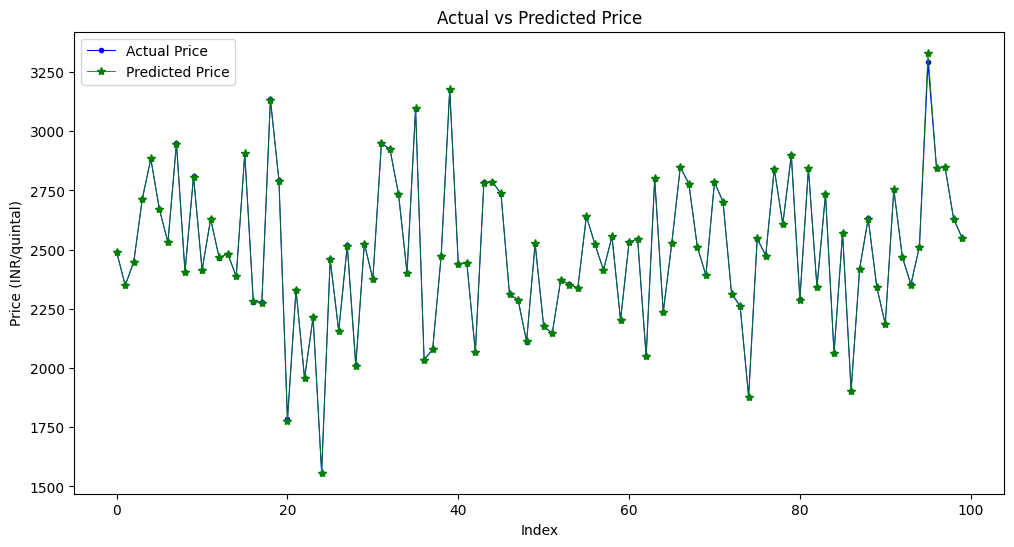

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
small_data=merged_data.iloc[:100]
# Plot actual prices
plt.plot(small_data.index, small_data['Price (INR/quintal)'], label='Actual Price', color='blue', marker='.',linewidth=0.8)

# Plot predicted prices
plt.plot(small_data.index, small_data['Predicted_Price'], label='Predicted Price', color='green', marker='*',linewidth=0.6)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price (INR/quintal)')
plt.title('Actual vs Predicted Price')
plt.legend()

# Show the plot
plt.show()


#**Thankyou**
